# Effects of HIV and Early Life Stress

### Import libraries

In [1]:
import pandas as pd
import numpy as np

path="/Users/pgarciaegan/Jupiter_Notebook/Vol_RAB_KMSK_deloutlier.csv"
df = pd.read_csv(path)
df.head(5)

,study_id,redcap_event_name,related_study_id,hiv_status,pid_scandate,Age,Sex,Race,Education,duration_of_infection,...,sust_conflict_family,Abuse,Neglect,fam_dysfunction,Abuse_1,fam_dysfunction_1,Interpersonal,Interpersonal_1,Interpersonal_B,Interpersonal_2
0,500147A,goldin_time2_arm_3,64877_MR2,0,500147A_121514,57,1,7,14,,...,1,1,0,2,1,1,1,1,2,1
1,213387L,goldin_time2_arm_3,75001_MR2,1,213387L_032414,46,0,7,15,205,...,1,1,0,3,1,1,1,1,1,1
2,214302F,goldin_time2_arm_3,75002_MR2,1,214302F_031214,40,0,7,8,375,...,0,1,0,0,1,0,1,1,1,1
3,214397J,goldin_time2_arm_3,75005_MR2,1,214397J_042414,38,1,7,12,88,...,0,0,0,1,0,1,0,0,0,0
4,214531A,goldin_time2_arm_3,75006_MR2,1,214531A_022614,40,0,7,12,74,...,0,1,1,1,1,1,2,1,3,1


### Description of parameters of numeric variables

In [48]:
stats = df[['Age','Education', 'EF_Z', 'BDI_Total', 'Norm_Frontlobe', 'Norm_Templobe', 'Norm_Parlobe', 'Norm_SubCortGray']].describe(include='all')
stats.loc['var'] = df.var()
stats.loc['skew'] = df.skew()
stats.loc['kurt'] = df.kurtosis()
stats.loc['std'] = df.std()
stats

,Age,Education,EF_Z,BDI_Total,Norm_Frontlobe,Norm_Templobe,Norm_Parlobe,Norm_SubCortGray
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,43.277778,13.559028,-0.185836,7.805556,0.108364,0.070021,0.072040,0.039108
std,17.502591,2.369225,0.802591,7.263366,0.010766,0.007093,0.007244,0.004259
min,18.000000,8.000000,-2.555556,0.000000,0.087570,0.052952,0.056017,0.027541
25%,23.750000,12.000000,-0.726930,2.000000,0.100040,0.064666,0.066682,0.036112
50%,48.000000,13.000000,-0.131888,6.000000,0.108117,0.069839,0.072021,0.039055
75%,57.000000,16.000000,0.420252,13.000000,0.115702,0.074586,0.076906,0.041721
max,89.000000,20.000000,2.053759,29.000000,0.139783,0.091612,0.095841,0.051184
var,306.340689,5.613228,0.644152,52.756485,0.000116,0.000050,0.000052,0.000018
skew,-0.023644,0.291509,-0.156719,0.902819,0.264447,0.246640,0.285458,0.191716


Interpretation of parameters:
- 288 of cases
- No missing values
- The skweness of the variable BDI-Total, which is a Depression Scale is close to one indicating right skewness. 
- The kurtosis of the variable Age is more than minus 1, which indicates extreme values in lower end of the  distribution.

### Import libraries for visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Use histograms to visualize the distribution of the data

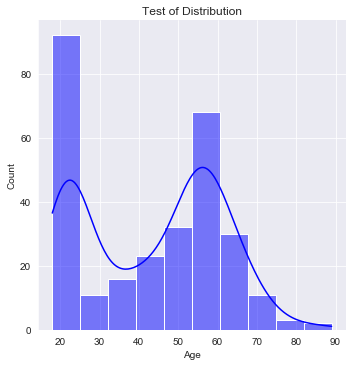

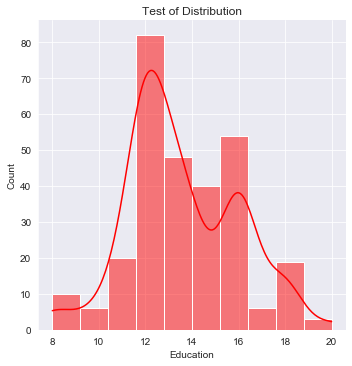

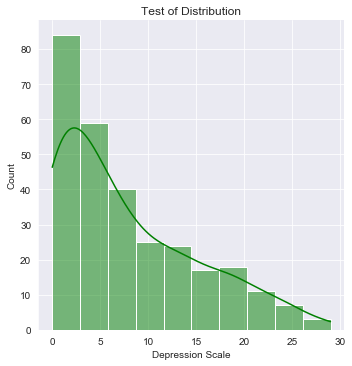

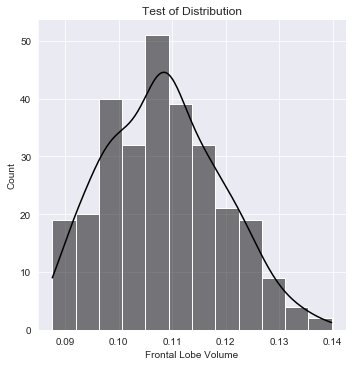

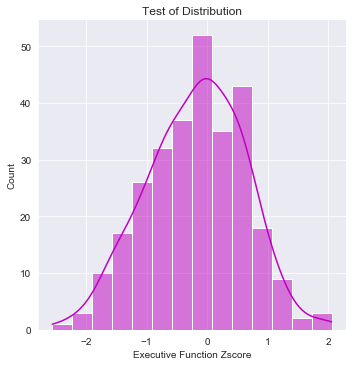

In [40]:
sns.set_style('darkgrid')
sns.displot(df['Age'],kde=True, color="b").set(title='Test of Normal Distribution', xlabel='Age', ylabel='Count')
plt.show()
sns.displot(df['Education'], kde=True, color="r").set(title='Test of Normal Distribution', xlabel='Education', ylabel='Count')
plt.show()
sns.displot(df['BDI_Total'], kde=True, color="g").set(title='Test of Normal Distribution', xlabel='Depression Scale', ylabel='Count')
plt.show()
sns.displot(df['Norm_Frontlobe'], kde=True, color="k").set(title='Test of Normal Distribution', xlabel='Frontal Lobe Volume', ylabel='Count')
plt.show()
sns.displot(df['EF_Z'], kde=True, color="m").set(title='Test of Normal Distribution', xlabel='Executive Function Zscore', ylabel='Count')
plt.show()

Interpretation of histograms:
 - Age and Education seem to be bimodal
 - Depression is right skewed
 - Volumetric measure of frontal lobe is somewhat right skewed
 - Executive Function seems to be a normal distribution

### Use Boxplots to detect outliers

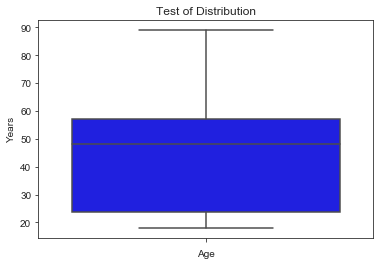

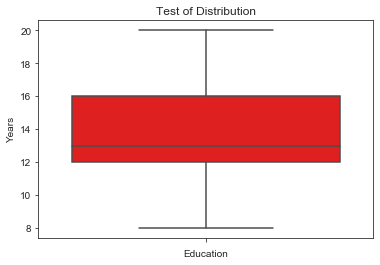

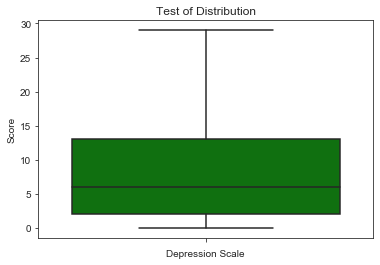

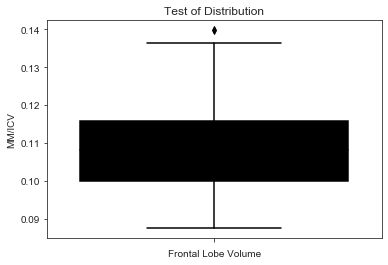

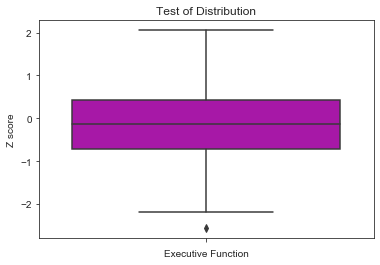

In [42]:
sns.set_style('ticks')
sns.boxplot(y= "Age", data=df, color="b").set(title='Test of Distribution', xlabel='Age', ylabel='Years')
plt.show()

sns.boxplot(y= "Education", data=df, color="r").set(title='Test of Distribution', xlabel='Education', ylabel='Years')
plt.show()

sns.boxplot(y= "BDI_Total", data=df, color="g").set(title='Test of Distribution', xlabel='Depression Scale', ylabel='Score')
plt.show()

sns.boxplot(y= "Norm_Frontlobe", data=df, color="k").set(title='Test of Distribution', xlabel='Frontal Lobe Volume', ylabel='MM/ICV')
plt.show()

sns.boxplot(y= 'EF_Z', data=df, color="m").set(title='Test of Distribution', xlabel='Executive Function', ylabel='Z score')
plt.show()

Interpretation of Boxplots:
- An outlier is detected in the upper end of Frontal lobe Volume
- An outlier is detected in the lower end of Executive Function


### Description of the categorical variables

In [5]:

print(df['Sex'].value_counts())
print(df['Race'].value_counts())
print(df['hiv_status'].value_counts())
print(df['Abuse_1'].value_counts())
print(df['ELSQ3'].value_counts())

0    182
1    106
Name: Sex, dtype: int64
7    171
8    112
4      2
1      2
2      1
Name: Race, dtype: int64
1    157
0    131
Name: hiv_status, dtype: int64
0    182
1    106
Name: Abuse_1, dtype: int64
1    164
0    124
Name: ELSQ3, dtype: int64


### Visualization of categorical variables in the sample

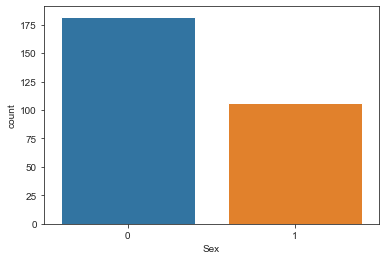

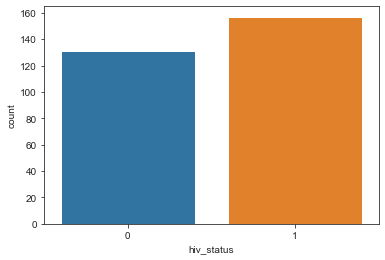

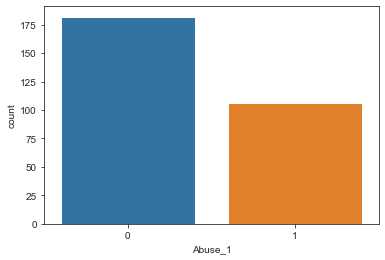

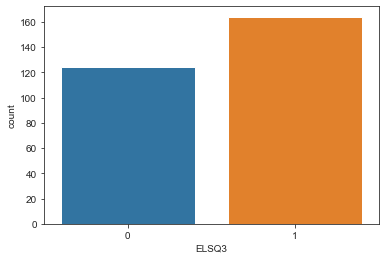

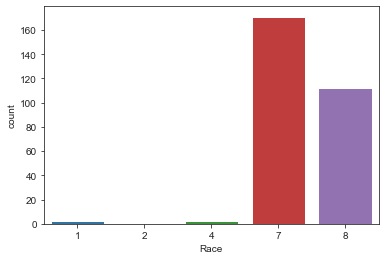

Male     NaN
Female   NaN
Name: Sex, dtype: float64

In [22]:
sns.countplot(x= "Sex", data=df)
plt.show()

sns.countplot(x= 'hiv_status', data=df)
plt.show()

sns.countplot(x= 'Abuse_1', data=df)
plt.show()

sns.countplot(x= 'ELSQ3', data=df)
plt.show()

sns.countplot(x= 'Race', data=df)
plt.show()


### Visualization of group differences in distribution of numeric variables

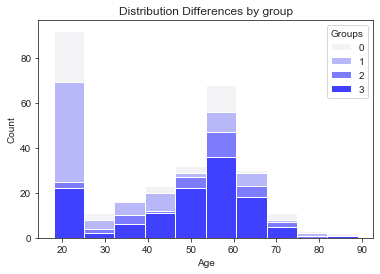

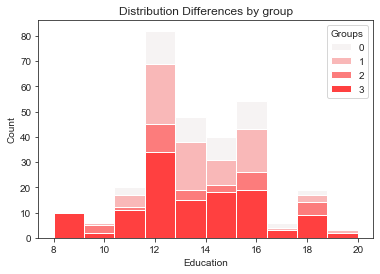

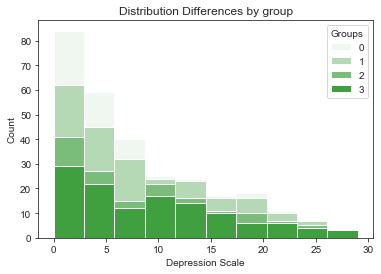

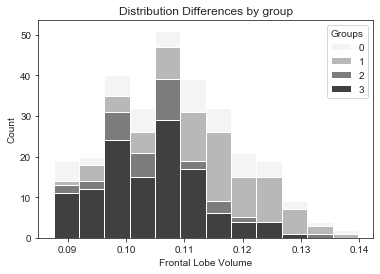

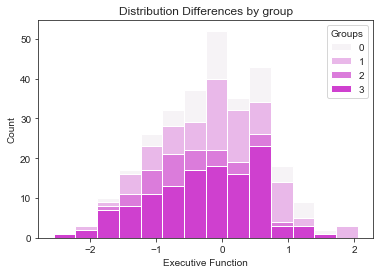

In [56]:
sns.histplot(data=df, stat="count", multiple="stack",
             x="Age", kde=False,
             palette="light:b", hue="Groups",
             element="bars", legend=True).set(title='Distribution Differences by group')
#plt.legend(Groups['HIV-/ELS-', 'HIV-/ELS+', 'HIV+/ELS-', 'HIV+/ELS+'])
plt.show()

sns.histplot(data=df, stat="count", multiple="stack",
             x="Education", kde=False,
             palette="light:r", hue="Groups",
             element="bars", legend=True).set(title='Distribution Differences by group')
plt.show()

sns.histplot(data=df, stat="count", multiple="stack",
             x="BDI_Total", kde=False,
             palette="light:g", hue="Groups",
             element="bars", legend=True).set(title='Distribution Differences by group', xlabel='Depression Scale')
plt.show()

sns.histplot(data=df, stat="count", multiple="stack",
             x="Norm_Frontlobe", kde=False,
             palette="light:k", hue="Groups",
             element="bars", legend=True).set(title='Distribution Differences by group', xlabel='Frontal Lobe Volume')
plt.show()

sns.histplot(data=df, stat="count", multiple="stack",
             x="EF_Z", kde=False,
             palette="light:m", hue="Groups",
             element="bars", legend=True).set(title='Distribution Differences by group', xlabel='Executive Function')
plt.show()


Interpretation of Stackable histograms:
- HIV-/ELS- groups seems to be younger, but distributions appear not very different
- HIV-/ELS- groups seems to have higher Education and HIV+/ELS+ appear to have lower Education
- HIV-/ELS- groups seems to have lower Depression scores and HIV+/ELS+ appear to have higher deppression scores


### Visualization of group differences in distribution of numeric variables by sex

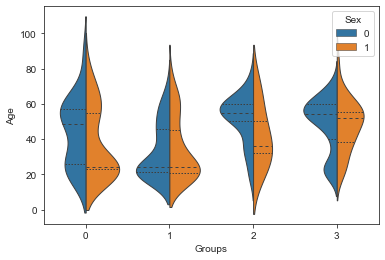

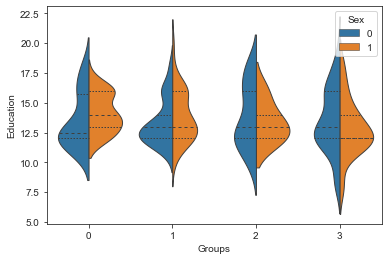

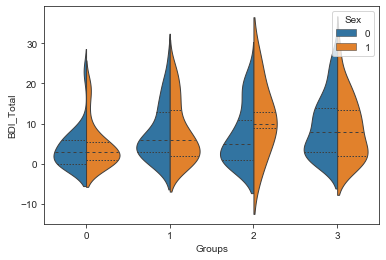

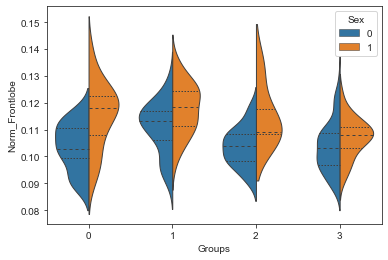

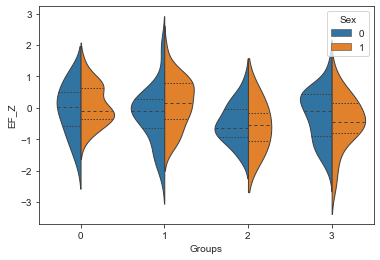

In [33]:
sns.violinplot(data=df, x="Groups", y="Age", hue="Sex",
               split=True, inner="quart", linewidth=1)
plt.show()

sns.violinplot(data=df, x="Groups", y="Education", hue="Sex",
               split=True, inner="quart", linewidth=1)
plt.show()

sns.violinplot(data=df, x="Groups", y="BDI_Total", hue="Sex",
               split=True, inner="quart", linewidth=1)
plt.show()

sns.violinplot(data=df, x="Groups", y="Norm_Frontlobe", hue="Sex",
               split=True, inner="quart", linewidth=1)
plt.show()

sns.violinplot(data=df, x="Groups", y="EF_Z", hue="Sex",
               split=True, inner="quart", linewidth=1)
plt.show()

### Visualization of distribution differences by groups and detection of outliers

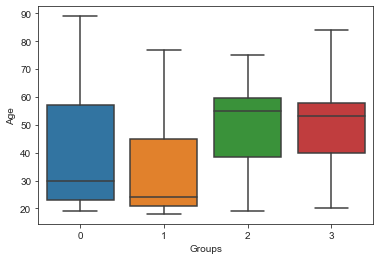

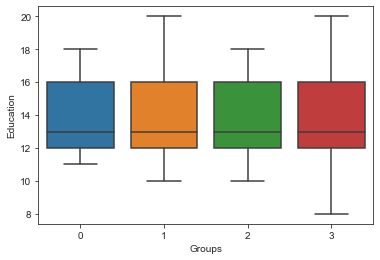

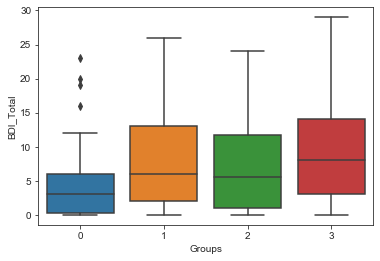

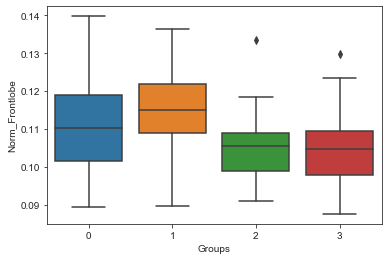

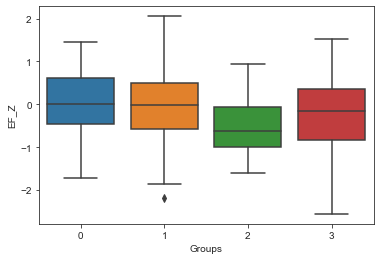

In [26]:
sns.boxplot(y= "Age", x='Groups', data=df, palette= )
plt.show()
sns.boxplot(y= "Education", x='Groups', data=df)
plt.show()
sns.boxplot(y= "BDI_Total", x='Groups', data=df)
plt.show()
sns.boxplot(y= "Norm_Frontlobe", x='Groups', data=df)
plt.show()
sns.boxplot(y= "EF_Z", x='Groups', data=df)
plt.show()


Interpretation of Boxplots by groups:
- The HIV groups is older
- The HIV+ and ELS+ group has a bigger distribution in Education
- The HIV- and ELS- has lower depression than the rest of the groups
- The HIV- groups have bigger frontal lobes
- The HIV- groups have better scores in executive functions

### Detect significant differences in numeric variables by group with non-parametric test Kruskal-Wallis H-test for independent samples

In [15]:
from pingouin import kruskal, read_dataset

kruskal(data=df, dv='Age', between='Groups')

,Source,ddof1,H,p-unc
Kruskal,Groups,3,40.578618,8.033154e-09


In [14]:
kruskal(data=df, dv='Education', between='Groups')

,Source,ddof1,H,p-unc
Kruskal,Groups,3,2.511392,0.473236


In [16]:
kruskal(data=df, dv='BDI_Total', between='Groups')

,Source,ddof1,H,p-unc
Kruskal,Groups,3,18.194742,0.000401


In [17]:
kruskal(data=df, dv='Norm_Frontlobe', between='Groups')

,Source,ddof1,H,p-unc
Kruskal,Groups,3,48.584205,1.599335e-10


In [27]:
kruskal(data=df, dv='EF_Z', between='Groups')

,Source,ddof1,H,p-unc
Kruskal,Groups,3,14.695002,0.002097


Interpretation of Kruskal-Wallis H-test:
- There are singnificant differences between the groups in age, depression scores, frontal lobe and executive functions